# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Sara Sawford

#### &#9989; April 28, 2023

# Comparing the Accuracy and Speed of Convergence of the Van der Pol Differential Equation

## Introduction 


The Van der Pol oscillator is a non-linear oscillator given by the homogenous second order differential equation
\begin{equation}
    \frac{d^2 x}{d^2 t} + \mu(1-x^2)\frac{dx}{dt} = 0,
\end{equation}
where $\mu$ is a scalar that represents the strength of damping and the non-linearity of the system [1]. It can be used to describe the current oscillations in a vacuum tube circuit, which acts similarly to an incandescent lightbulb [2].  The circuit can be simplified to a DC voltage source *E* in series with a a non-Ohmic resistor *R*, a capacitor *C*, and an inductor *I*, as shown in Figure 1.  For simplicity, let $L = 1$ such that $V = \frac{dI}{dt}$ (See Appendix A.1 for Proof).

Figure 1: A Van der Pol Oscillator with current that can be represented by Equation 1.


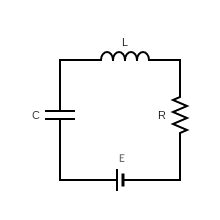

In [1]:
%matplotlib inline
from IPython.display import Image
print("Figure 1: A Van der Pol Oscillator with current that can be represented by Equation 1.")
Image('circuit-2.png')


Solving this differential equation is essentially finding the current through the circuit as a function of time.  However, because there is a non-linear term $1-x^2$, there is not an analytical solution for $\mu \neq 0$ for Equation 1, which means we must rely on numerical methods to find the current through the Van der Pol circuit [3].  However, different numerical methods yield different results in terms of the accuracy of convergence to the solution.  We must balance the accuracy we seek to the speed of the algorithm.  Therefore, there are three aim to this paper: to explore the numerical solutions with different damping factors, to explore the accuracy of different numerical methods, and to explore the speeds of the numerical methods.  It is important to note that although there is not an analytical solution for this differential equation, it was decided that accuracy was reached once the peak current at two different step sizes did not change.  For example, if the peak current at $N = 500$ steps was equal to that of $N = 1000$ steps, the numerical solution converged at $N = 500$ steps. 

Section 3 explores the numerical methods used as well as how the accuracy and speeds for calculated.  We also provide an example of the algorithm's solution to a well-known scenario to ensure accuracy of the algorithm itself.  Section 4 will discuss the results of the algorithm for different damping factor values.  Section 5 will be the conclusion, in which the ideal numerical method will be provided by weighing both accuracy and speed.  Further perspectives for this project will be considered.

## Methodology

To ensure my work was saved if my notebook crashed, I created a GitHub repository that I pushed the most updated copy of this notebook to.  I pushed my updates after every session that I worked on this notebook.  Once the final paper was finished, it was also pushed to ensure there were multiple copies saved.  The repository can be found here: https://github.com/sawfords/PHY480_Final_Project/tree/master

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
import time

We begin by modifying the second order differential equation to a linear system of first order differential equations below [6]:

$$
    x_1=\frac{dx}{dt} \nonumber \\ 
    \frac{dx_1}{dt}=\frac{d^2x}{d^2t} -x_2 + \mu(1-x_2^2)x_1 \nonumber \\

 
    x_2=x \nonumber \\
    \frac{dx_2}{dt}=\frac{dx}{dt} = x_1 \nonumber \\
$$

In Python, this corresponds to defining a function to take in initial values for $x_1$ and $x_2$, and outputting solutions for $\frac{dx_1}{dt}$ and $\frac{dx_2}{dt}$, as shown in Figure 2.

In [160]:
def f(x, mu):
    ''' 
    Second order differential equation as system of first order differential equations
    Parameters:
        x (array): Stores initial conditions for current voltage as [I, V]
        mu (float): Damping factor
    Returns:
        Array of derivatives of I,V
    '''

    # Unpack x = (x1, x2)
    x1 = x[0] # Current (Amps)
    x2 = x[1] # Voltage (V)
    dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
    dx2 = x1 # dx2/dt
    return np.array([dx1,dx2], float)


### A. Numerical Methods

We can use the output of the above function to update $x$ and $dx$ using three different methods: Euler's Method (Euler),the Second-Order Runge Kutta Method (RK2), and the Fourth-Order Runge Kutta Method (RK4).

First, let us consider Euler's Method, which gives us a solution to the differential equation using the formula $$ x(t+h) \approx x(t) + h f(x,t),$$ and is given by the cell below, except modified to input two variables to represent the two first-order differential equations.

In [161]:
def Euler(y,dy,r,tpoints,h,mu):
    ''' 
    Euler's Method. Updates I,V solutions for each time step t
    Parameters:
        y (empty array): Stores Current solution
        dy (empty array): Stores Voltage solution
        r (array): x(t+h) in Euler's Formula, given as [I,V]
        tpoints (array): Time to calculate I,V at. Equally spaced time steps
        h (float): Size of single time step. Also known as Delta T
        mu (float): Damping factor
    Returns:
        No variables returned, but y, dy updated outside of function
    '''
    # Calculate solution at each time step
    for t in tpoints:
        # Update Current solution
        y.append(r[0])
        # Update Voltage solution
        dy.append(r[1])
        # Calculate x(t+h) to be used as x(t) in next iteration
        r += h*f(r,mu)


Next, we use the Second-Order Runge Kutta Method (RK2), given by the formula 
$$\begin{align}
k_1 &= hf(x,t) \\
k_2 &= h f\left(x+\frac{1}{2}k_1,t+\frac{1}{2}h \right) \\
x(t+h) &= x(t)+k_2
\end{align}$$

Again, the code in the cell below is modified to update both current and voltage.

In [162]:
def RK2(y,dy, r, tpoints, h,mu):
    ''' 
    2nd-Order Runge Kutta Method. Updates I,V solutions for each time step t according to RK2 Formula
    Parameters:
        y (empty array): Stores Current solution
        dy (empty array): Stores Voltage solution
        r (array): x(t+h) in Euler's Formula, given as [I,V]
        tpoints (array): Time to calculate I,V at. Equally spaced time steps
        h (float): Size of single time step. Also known as Delta T
        mu (float): Damping factor
    Returns:
        No variables returned, but y, dy updated outside of function
    '''
    
    # Calculate solution at each time step
    for t in tpoints:
        # Update Current Solution
        y.append(r[0])
        # Update Voltage Solution
        dy.append(r[1])
        # Use previous solution to calculate solutions at t+1 according to 2nd-Order Runge Kutta Formula
        k_1= h*f(r,mu)
        k_2 = h*f((r+0.5*k_1),mu)
        r += k_2 

Finally, we will study the Fourth-Order Runge Kutta Method (RK4), given by 
$$\begin{align}
k_1 &= hf(x,t) \\
k_2 &= h f\left(x+\frac{1}{2}k_1,t+\frac{1}{2}h \right) \\
k_3 &= h f\left(x+\frac{1}{2}k_2,t+\frac{1}{2}h \right) \\
k_4 &= h f\left(x+\frac{1}{2}k_3,t+h \right) \\
x(t+h) &= x(t)+\frac{1}{6}( k_1+2k_2+2k_3+k_4)
\end{align}$$

In [163]:
def RK4(y,dy,r,tpoints,h,mu):
    ''' 
    4th-Order Runge Kutta Method. Updates I,V solutions for each time step t according to RK4 Formula
    Parameters:
        y (empty array): Stores Current solution
        dy (empty array): Stores Voltage solution
        r (array): x(t+h) in Euler's Formula, given as [I,V]
        tpoints (array): Time to calculate I,V at. Equally spaced time steps
        h (float): Size of single time step. Also known as Delta T
        mu (float): Damping factor
    Returns:
        No variables returned, but y, dy updated outside of function
    '''
    
    # Calculate solution at each time step
    for t in tpoints:
        # Update Current Solution
        y.append(r[0])
        # Update Voltage Solution
        dy.append(r[1])
        # Use previous solution to calculate solutions at t+1 according to 4th-Order Runge Kutta Formula
        k1 = h*f(r,mu)
        k2 = h*f(r+0.5*k1,mu)
        k3 = h*f(r+0.5*k2,mu)
        k4 = h*f(r+k3,mu)
        r += (k1+2*k2+2*k3+k4)/6

### B. Testing the Numerical Methods

It is especially important to verify the accuracy of the algorithm created because there are not analytical solutions to compare the solutions against when the damping factor is non-zero.  To verify accuracy, we begin by exploring the solutions to the Van der Pol differential equation without a driving force when $\mu = 0$, which turns Equation 1 into
\begin{equation}
    \frac{d^2 x}{d^2 t} = -x,
\end{equation}
which is the well known formula for a harmonic oscillator with the solution $x(t) = Acos(\omega t)$.  

The cell below will plot the solutions using the numerical method as well as the difference between the numerical methods and the analytical solution.  The analytical solution uses initial conditions of $I(0) = .5 A$ and $\frac{dI}{dt} = V = 0 V$.

Text(0.5, 1.0, 'Difference Between Analytical and Numerical Solutions 0')

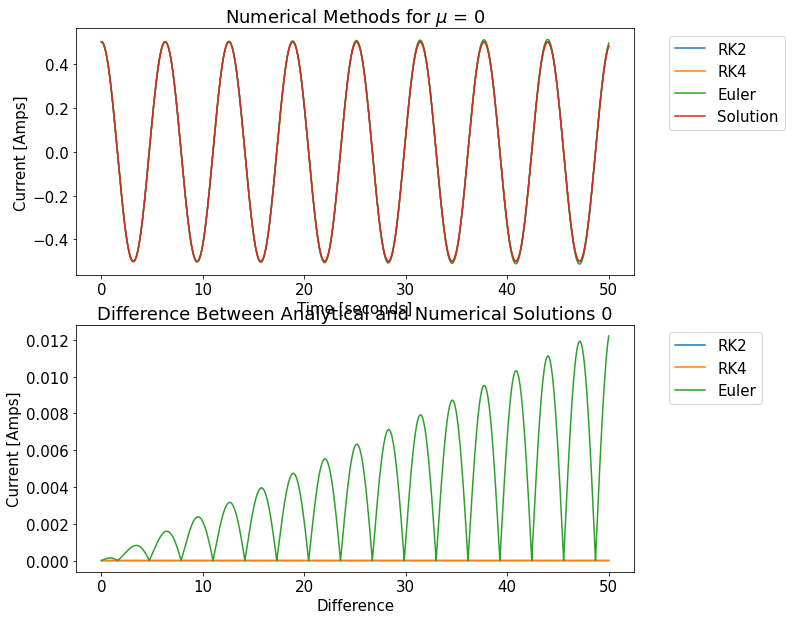

In [164]:
# Start of interval
a = 0.0
# End of interval
b = 50.0

# Number of steps
N = 50000
# Size of single step
h = (b-a)/N

# mu= 0 simplifies dif-eq into easy-to-solve equation to test accuracy of functions
mu = 0.0

# Set up initial arrays
# Array to store time steps
tpoints = np.arange(a,b,h)
# Array to store Current (y)
y = []
# Array to store Voltage (dy)
dy = []
# Initial conditions: I = .5 A, V = 0.
r = np.array([.5,0.],float)

# Append each solution array so all solutions are in one array
y_sol = []
dy_sol = []

# Iterate through three different methods
for i in range(0,3):
    # Reset initial arrays and conditions
    y = []
    dy = []
    r = np.array([.5,0.],float)
    if i == 0:
        # Update y,dy using RK2
        RK2(y,dy,r,tpoints,h, mu)
        # Add current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)
    elif i == 1:
        # Update y,dy using RK4
        RK4(y,dy,r,tpoints,h,mu)
        # Append current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)

    else:
        # Update y,dy using Euler's Method
        Euler(y,dy,r,tpoints,h,mu)
        # Append current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)

# Analytical solution to the Van der Pol Differential Equation when mu = 0.
actual = .5*np.cos(tpoints)

# Set up subplots to plot solutions and difference
fig, ax = plt.subplots(2,1)
fig.set_size_inches(10,10)

# Plot numerical methods' solutions
# Plot RK2 against time
ax[0].plot(tpoints,y_sol[0], label = "RK2")
# Plot RK4 against time
ax[0].plot(tpoints,y_sol[1], label = "RK4")
# Plot Euler against time
ax[0].plot(tpoints,y_sol[2], label = "Euler")
# Plot analytical solution
ax[0].plot(tpoints, actual, label = "Solution")
# Set plot features
ax[0].legend(bbox_to_anchor=(1.05,1), loc="upper left")
ax[0].set_xlabel("Time [seconds]")
ax[0].set_ylabel("Current [Amps]")
ax[0].set_title("Numerical Methods for $\mu$ = " + str(0))

# Plot difference bewteen analytical solution and numerical method
# Plot RK2 - analytical against time
ax[1].plot(tpoints,abs(y_sol[0] - actual), label = "RK2")
# Plot RK4-analytical against time
ax[1].plot(tpoints,abs(y_sol[1] - actual), label = "RK4")
# Plot Euler-analytical against time
ax[1].plot(tpoints,abs(y_sol[2] - actual), label = "Euler")
# Set plot features
ax[1].legend(bbox_to_anchor=(1.05,1), loc="upper left")
ax[1].set_xlabel("Difference")
ax[1].set_ylabel("Current [Amps]")
ax[1].set_title("Difference Between Analytical and Numerical Solutions " + str(0))

Based on the first figure, it is clear that all numerical algorithms are written correctly. Although in the second figure we see Euler’s method diverges from the analytical solution, the difference after 50 seconds is only 1.2 %, which can be excused as numerical inaccuracy, not an incorrect algorithm. From the same figure, we see there is no noticeable difference between the analytical solution and either the Second- or Fourth-Order Runge Kutta Methods. Therefore, we are able to proceed with the methodology for damping factors greater than 0.

### C. Calculating Accuracy and Speed
Now that our functions have been tested, we can figure out which numerical method will converge to a solution with the fewest step sizes and the fastest.  Although there is no analytical solution for $\mu \neq 0$, we assert that a solution will be found when difference between the plots of two different step sizes is approximately 0.  The step sizes used are $$N = 100, 250, 500, 1000, 2500, 5000, 7500, 10000.$$

We will start with a function that inputs the number of points to calculate the current for between two bounds and an index to plot the results on separate subplots.  It also calculates the time it takes to run each numerical method, and returns the times as an array.  For this project, it is assumed that $I(0) = .5 A$, and $V(0) = 0 V$.

In [165]:
def changing_number_points(N, index, jindex, mu, ax):
    ''' 
    Run each numerical method and plot solution of current vs time for different number of steps
    Parameters:
        N (string): Number of steps, 
        index (int): index of subplot to plot results in
        mu (float): damping factor
    Returns:
        y_sol_rk2, y_sol_rk4, y_sol_euler (arrays): Solution to current using respective numerical method         
        dy_sol (array): Solution to voltage (dI/dt)
        t (array): Speed of numerical method
    '''

    # Start of interval
    a = 0.0
    # End of interval
    b = 50.0

    # Size of single step
    h = (b-a)/N

    # mu= 0 simplifies dif-eq into easy-to-solve equation to test accuracy of functions
    mu = mu

    # Set up initial arrays
    # Array to store time steps
    tpoints = np.arange(a,b,h)
    # Array to store Current (y)
    y = []
    # Array to store Voltage (dy)
    dy = []
    # Initial conditions: I = .5 A, V = 0.
    r = np.array([.5,0.],float)

    # Append each solution array so all solutions are in one array
    y_sol_rk2 = []
    y_sol_rk4 = []
    y_sol_euler = []
    dy_sol = []

    # Array to store speed of each numerical method
    t = []

    for i in range(0,3):
        # Reset initial arrays and conditions
        y = []
        dy = []
        r = np.array([.5,0.],float)

        # Start timer
        st = time.time()

        if i == 0:
            # Update y,dy using RK2
            RK2(y,dy,r,tpoints,h, mu)
            # Add current and voltage solutions to array to plot later
            y_sol_rk2 = y
            dy_sol.append(dy)
            
        elif i == 1:
            # Update y,dy using RK4
            RK4(y,dy,r,tpoints,h,mu)
            # Append current and voltage solutions to array to plot later
            y_sol_rk4 = y
            dy_sol.append(dy)

        else:
            # Update y,dy using Euler's Method
            Euler(y,dy,r,tpoints,h,mu)
            # Append current and voltage solutions to array to plot later
            y_sol_euler = y
            dy_sol.append(dy)

        # Stop timer
        et = time.time()
        # Calculate difference between initial and final time to find time taken to run numerical method
        t.append(et - st)

    # if (N == 500) or (N == 2500) or (N == 5000) or (N == 10000):
        # Plot the current as a function of time for each numerical method
        # Check all values of solution are less than 100 to catch overflow errors
    if(all(x < 100 for x in y_sol_rk2)):
        ax[index][jindex].plot(tpoints,y_sol_rk2, label = "RK2")
    if(all(x < 100 for x in y_sol_rk4)):
        ax[index][jindex].plot(tpoints,y_sol_rk4, label = "RK4")
    if(all(x < 100 for x in y_sol_euler)):
        ax[index][jindex].plot(tpoints,y_sol_euler, label = "Euler")

    # Set plot features
    ax[index][jindex].legend()
    ax[index][jindex].set_xlabel("Time [s]")
    ax[index][jindex].set_ylabel("Current [A]")
    ax[index][jindex].set_title("N = " + str(N))

        # Return numerical solutions
    return y_sol_rk2, y_sol_rk4, y_sol_euler, dy_sol, t


Before mentioning the next function, it is important to describe the SciPy function called signal.find_peaks_cwt [5]. It takes an array and the width of the matrix used in calculations, and returns an array of the indices of the relative maxima of the initial array. As a note, for the remainder of this study, the relative maxima will be called the peaks of the current output. This function is essential to calculating the peak current to find the accuracy of a numerical method at each step. We use the current solution array for one numerical method outputted by changing number points as an input to signal.find_peaks_cwt, which gives us the time at which the peak occurred for the specific numerical method and the specific number of steps.

In [166]:
from scipy.signal import find_peaks_cwt

Once we have the time at which the peak currents occur, we call another function called accuracy, which takes inputs of the peak currents and the solution to the differential equation for each numerical method. This function uses the indices in the peak current array to find the value for the peak current in the solutions array for the number of steps N and N − 1. It then calculates average difference between the peaks of the solutions and plots it as a function of the number of steps. Since we are comparing two different numbers of steps, it plots the average distance at the $N−1$-th number of steps, not the $N$ -th number of steps.

In [167]:
def accuracy(N, peaks, y_sol, method, ax1, mu):
    '''  
    Makes scatter plot of the average difference between the peak of two different step sizes versus step size
    Parameters:
        N (array): All step sizes considered
        peaks (array): Array of indexes of relative maxima of Current
        y_sol (array): Array of Current solution using specific numerical method
        method (string): Specific numerical method, used to set label
        ax1 (matplotlib Axis): Axis to plot average distance between peaks
        mu (float): Damping factor
    Returns:    
        No return values
    '''

    # Emtpy array to fill with average distances between peaks
    average = []

    # Only occurs in over/critically damped that the peaks found are not all accurate
    # Need to check the peaks are truly the maximum
    if mu >= 1:
        # Will temporarily store the peaks that fit the criteria
        temp = []
        # 2D Array to temporarily store peaks from temp
        new_peaks = []
        
        # Iterate over all arrays in the 2D array
        for i in range(len(peaks)):
            # Reset temp to empty with each iteration
            temp = []
            # Iterate over all values in each array
            for val in peaks[i]:
                # If the peak is a maximum, save in temp
                # Maximum occurs when current >= 2 Amps
                if (y_sol[i][val]) >= 2:
                    temp.append(val)
            # Save true peaks found in temp
            new_peaks.append(np.array(temp))
        # Replace peaks array with the new_peaks (store true maximum current values)
        peaks = new_peaks

    # Don't include 0 plotting i and i-1
    for i in range(1,len(peaks)):
        # Initialize empty arrays that store the current at the index indicated (the relative maximum current)
        temp1 = []
        temp2 = []
        # Adding all relative maxima to an array
        for val in peaks[i]:
            temp1.append(y_sol[i][val])
        # Same functionality as above two lines except for i-1 to get the previous step size results
        for val in peaks[i-1]:
            temp2.append(y_sol[i-1][val])

        # If there is only one peak listed, will subtract single peak from each peak in other array
        if(len(temp1) == 1 or len(temp2) == 1):
            # average.append(np.average((abs(np.array(temp1)) - (abs(np.array(temp2))))))
            average.append(np.average((np.array(temp1)) - ((np.array(temp2)))))
        else:
            # If different number of peaks, edit array so same length
            # Removing any peak that is above the length of the smaller array
            if len(temp1) > len(temp2):
                temp1 = temp1[:len(temp2)]
            elif len(temp2) > len(temp1):
                temp2 = temp2[:len(temp1)]
            # average.append((np.average((abs(np.array(temp1)) - (abs(np.array(temp2)))))))
            average.append((np.average(((np.array(temp1)) - ((np.array(temp2)))))))

    # Plot step size versus absolute value of average distance
    ax1.scatter(N[:-1],abs(np.array(average)), label = method)
    ax1.set_xlabel("log(Step Size)")
    ax1.set_ylabel("Average Distance Between Peaks")
    ax1.set_title("Average Distance Between Peaks vs Step Size")
    ax1.set_xscale("log")
    ax1.set_xticks(N[:-1])
    ax1.legend()

The final function is called putting it all together, which is a function that calls changing number points, then calculates the peak current using signal.find peaks cwt, and finally calls accuracy. As a result, the plots of current vs time are plotted for each number of steps considered, the average distance between the peaks vs number of steps is plotted, and the speeds are plotted. This function takes in the damping factor, so the algorithm may run for the underdamped, overdamped, and critically damped scenarios.

In [168]:
def putting_it_together(mu, ax, ax1, ax2):
    '''  
    Runs all functions found above; plots solutions, accuracy, and speeds
    Parameters:
        mu (float): All step sizes considered
        ax, ax1, ax2 (matplotlib Axis): Axis to plot average distance between peaks, accuracy, or speed, respectively
    Returns:    
        No return values
    '''
    # Initialize all step sizes studied
    N = [100, 250, 500, 1000, 2500, 5000, 7500, 10000]

    # Set up plots to show solutions for current vs time

    # Initialze empty arrays to store time, current solutions, voltage solutions, and relative maxima of current
    y_sol_rk2 = []
    y_sol_rk4 = []
    y_sol_euler = []

    dy_sol = []
    speed = []

    rk2_peaks = []
    rk4_peaks = []
    euler_peaks = []

    # Values that correspond to index of subplot the solution should be plotted in
    index = 0
    jindex = 0

    print("Plotting solution to differential equation for different values of N")
    # Run changing_number_points for each step size in N
    for i in range(int(len(N))):
        # Update index, jindex so solution is plotted in correct subplot with format (4,2)
        if i < 4:
            index = i
            jindex = 0
        elif i >= 4:
            index = i -4
            jindex = 1

        # Save time, current, voltage, and speed
        rk2, rk4, euler, dy, t = changing_number_points(N[i],index, jindex, mu, ax)
        y_sol_rk2.append(rk2)
        y_sol_rk4.append(rk4)
        y_sol_euler.append(euler)

        dy_sol.append(dy)
        speed.append(t)
        
        # # Calculate relative maxima of current for each numerical method for all time steps 
        # # Only through 49 because (1,50) gives different number of peaks for each step size
        index = (find_peaks_cwt(y_sol_rk2[i], np.arange(1,49)))
        rk2_peaks.append(index)
        
        index = (find_peaks_cwt(y_sol_rk4[i], np.arange(1,49)))
        rk4_peaks.append(index)

        index = (find_peaks_cwt(y_sol_euler[i], np.arange(1,49)))
        euler_peaks.append(index)


    print("Plotting average difference between the same peaks of two different step sizes")
    # Plot accuracy of each numerical method with horizontal line at y = 0 for visualization
    accuracy(N, rk2_peaks, y_sol_rk2, "RK2", ax1, mu)
    accuracy(N, rk4_peaks, y_sol_rk4, "RK4", ax1, mu)
    accuracy(N, euler_peaks, y_sol_euler, "Euler", ax1, mu)
    ax1.axhline(y = 0, color = "black", linewidth = .5)

    print("Plotting speed of each numerical method")    
    # Initialize arrays to store speed of each numerical method
    rk2_time = []
    rk4_time = []
    euler_time = []

    # Iterate over all times to store speed of algorithm by the type of algorithm
    for i in range(len(speed)):
        rk2_time.append(speed[i][0])
        rk4_time.append(speed[i][1])
        euler_time.append(speed[i][2])

    # Plot time as a function of number of steps
    ax2.scatter(N,rk2_time, label = "RK2")
    ax2.scatter(N,rk4_time, label = "RK4")
    ax2.scatter(N,euler_time, label = "Euler")
    ax2.legend()
    ax2.set_xlabel("log(Step Size)")
    ax2.set_ylabel("log(Time) (s)")
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_title("Step Size vs Time")


## Results and Discussion

#### A. Underdamped, $\mu = .1$
First, the results are presented for the underdamped case in which μ = .1 in Figure 4.

Plotting solution to differential equation for different values of N
Plotting average difference between the same peaks of two different step sizes
Plotting speed of each numerical method


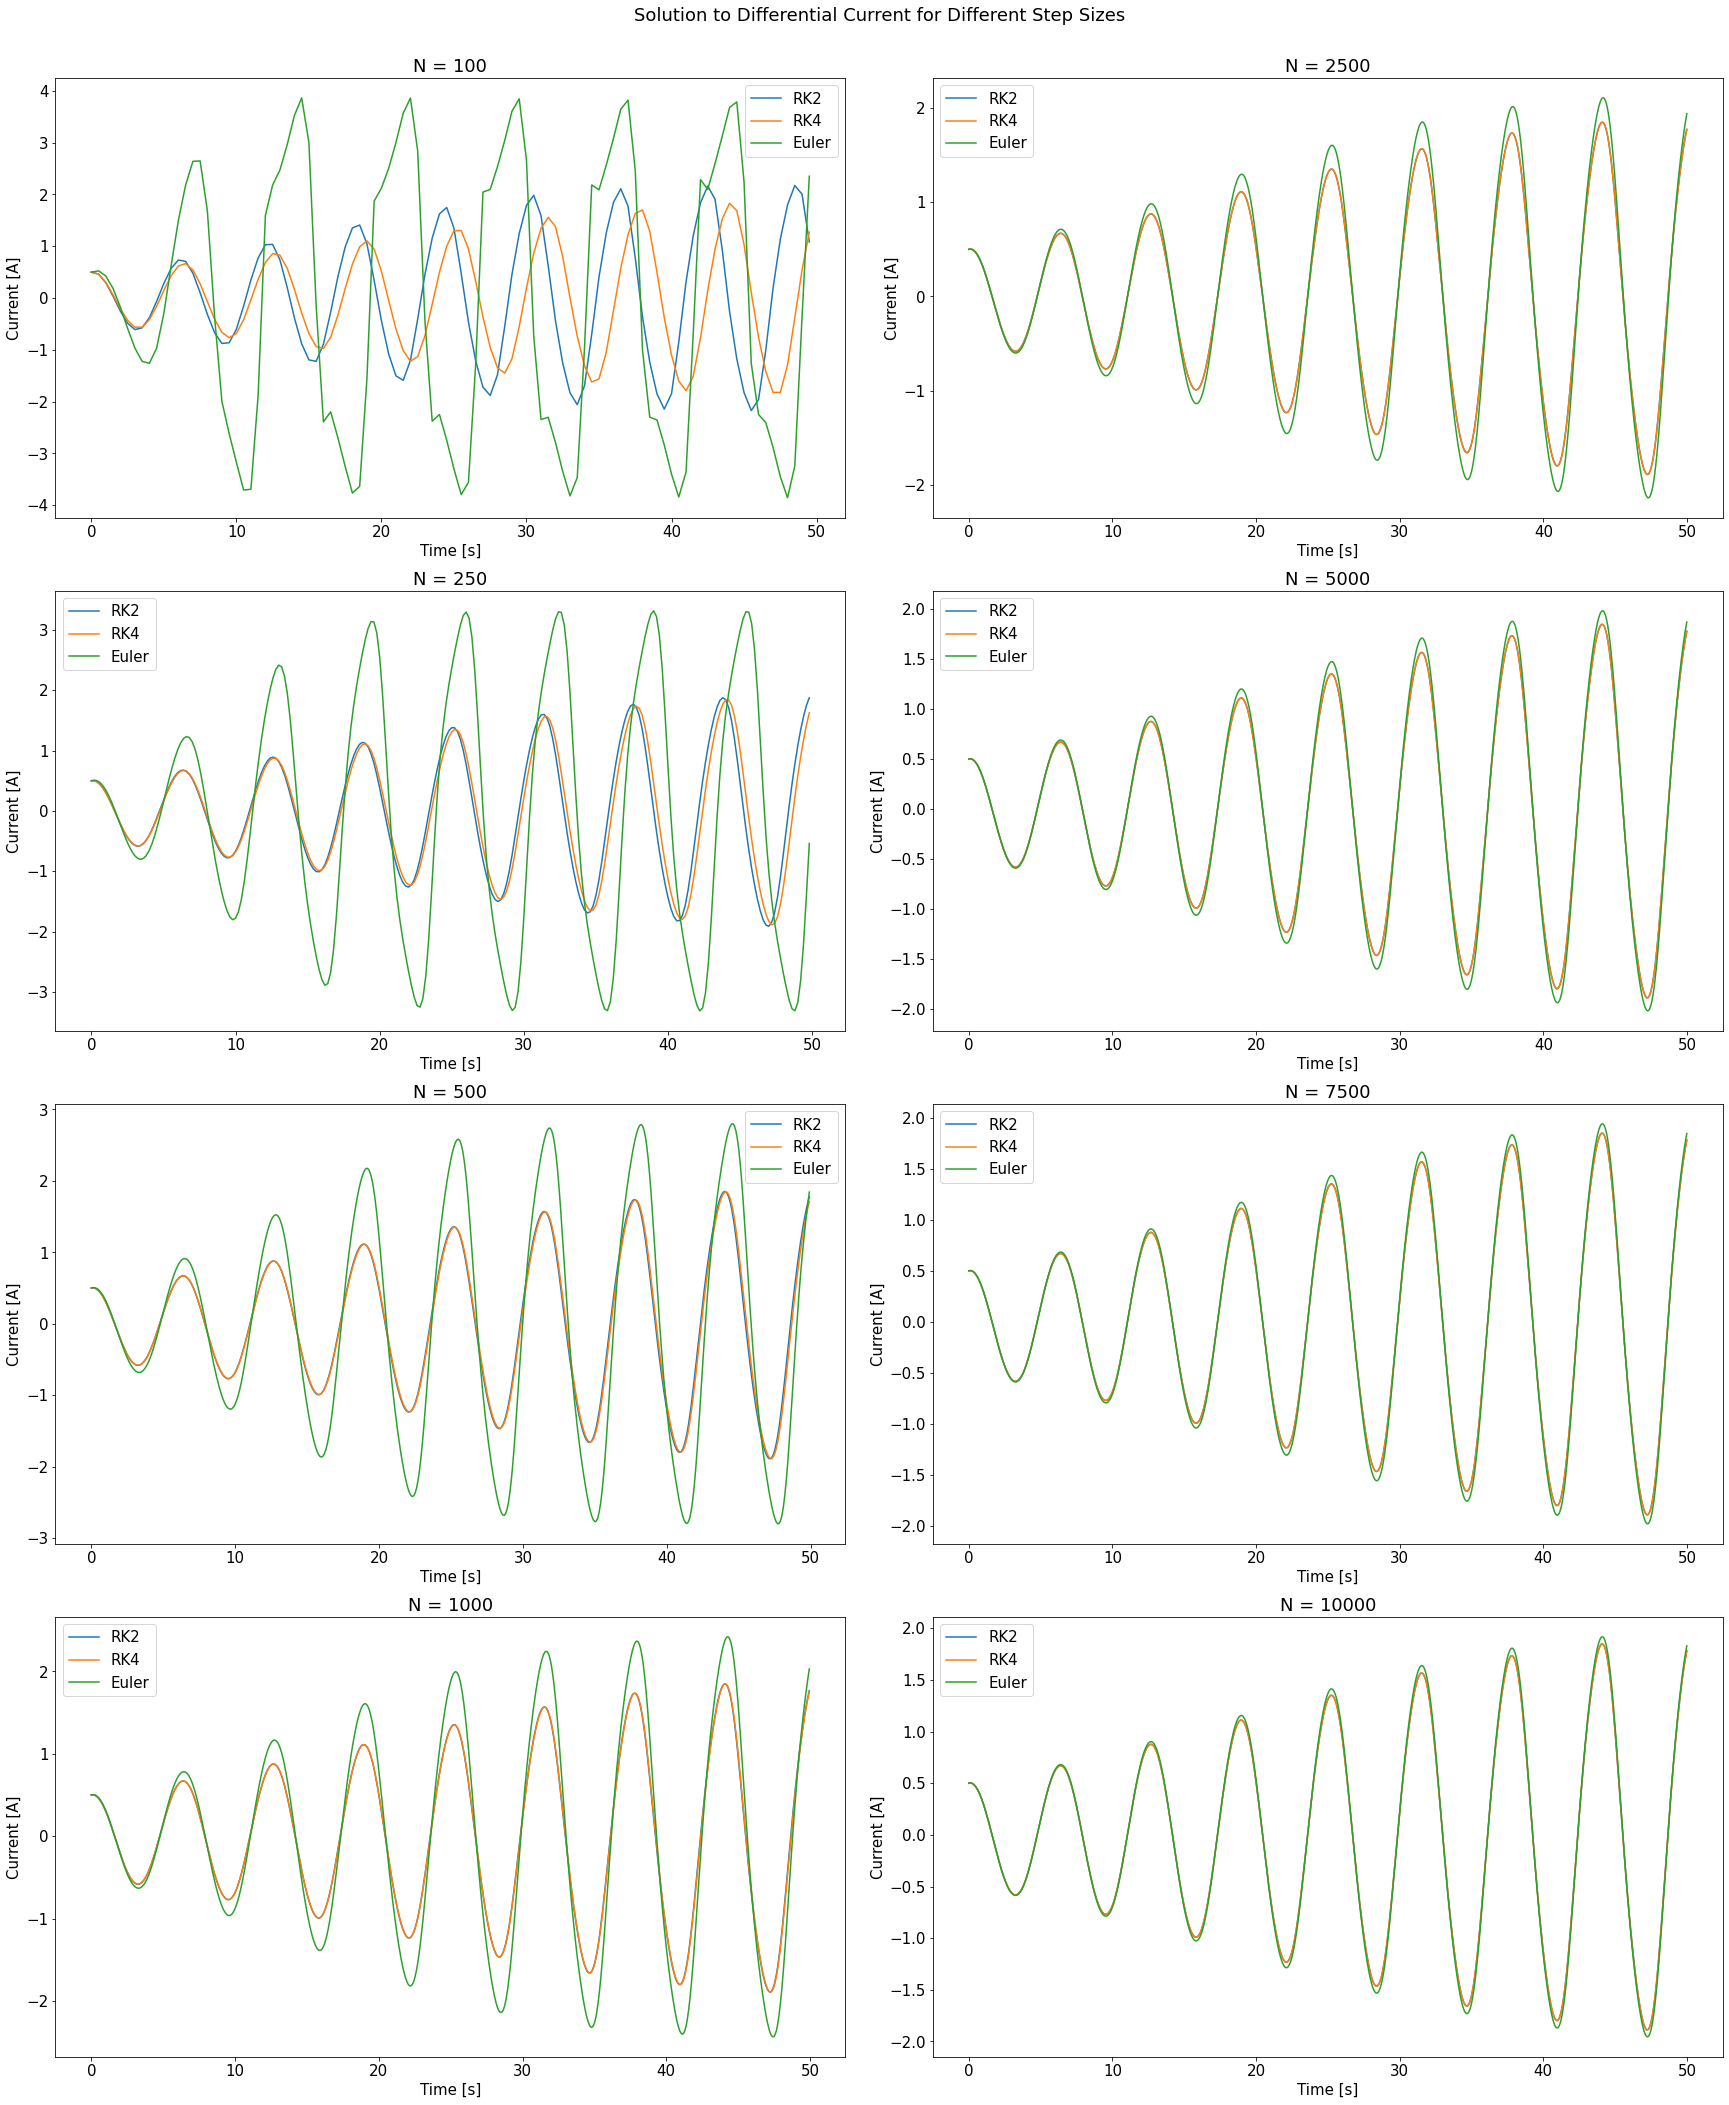

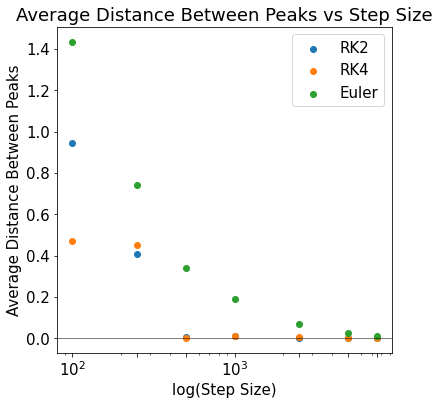

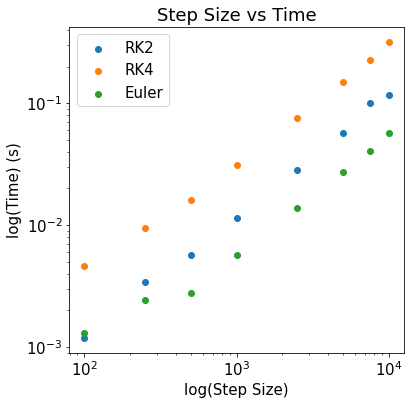

In [171]:
# Increase text size on all figures
plt.rcParams.update({'font.size': 15})

# Figure and axis to plot solutions
fig,ax = plt.subplots(4,2)
fig.set_size_inches(25,30)
fig.suptitle("Solution to Differential Current for Different Step Sizes")
fig.tight_layout(pad = 3)

# Figure, axis to plot accuracy
fig1,ax1 = plt.subplots(1)
fig1.set_size_inches(6,6)

# Figure to plot speed
fig2, ax2 = plt.subplots(1)
fig2.set_size_inches(6,6)

# Run numerical methods and plot all variables needed
putting_it_together(.1, ax, ax1, ax2)


Based on the first figure, we see the numerical methods have about the same trend in that the amplitude of the peak current increases with each period for all number of steps. For N = 10000, it appears the Euler’s Method has still not converged to the same solution found by the Second- and Fourth-Order Runge Kutta Method. This observation is confirmed by looking at the second figure, which is the accuracy plot. At N = 7500, the average distance between the peaks for both Runge Kutta Methods is 0, while Euler’s Method is still not quite 0, meaning it is not quite converged to the true solution.

At N = 500, the average distance between the peak current is 0 for the Fourth-Order Runge Kutta Method, meaning the numerical solution converged to the true solution. For the Second-Order Runge Kutta Method, the solution at N = 500 is not quite 0, meaning this method takes more steps to converge to the true solution. Although there is a little fluctuation for both Runge Kutta Methods around N = 1000 steps, this is likely due to numerical inaccuracies when calculating the solution. As long as N = 1000 is considered to be a numerical fluctuation, and without errors would be a difference of 0, it may be assumed the Second-Order Runge Kutta Method converge by N = 1000 steps.

Considering the third figure, which is the speed of the alorigthms, clearly Euler’s Method is the fastest for every step size, followed by the Second-Order Runge Kutta Method, and then the Fourth-Order Runge Kutta Method. Note that this plot is given as a log-log scale, meaning an increase in the number of steps corresponds to an exponential increase in the time taken to run the numerical method.

#### B. Critically Damped, $\mu = 1$

We now repeat the same method for $\mu = 1$, for the case of the critically damped oscillator.

Plotting solution to differential equation for different values of N


/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/3821670174.py:14: RuntimeWarning: overflow encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/3821670174.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/3287941457.py:23: RuntimeWarning: invalid value encountered in add
  k_2 = h*f((r+0.5*k_1),mu)
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/2889960738.py:21: RuntimeWarning: invalid value encountered in add
  r += h*f(r,mu)


Plotting average difference between the same peaks of two different step sizes
Plotting speed of each numerical method


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


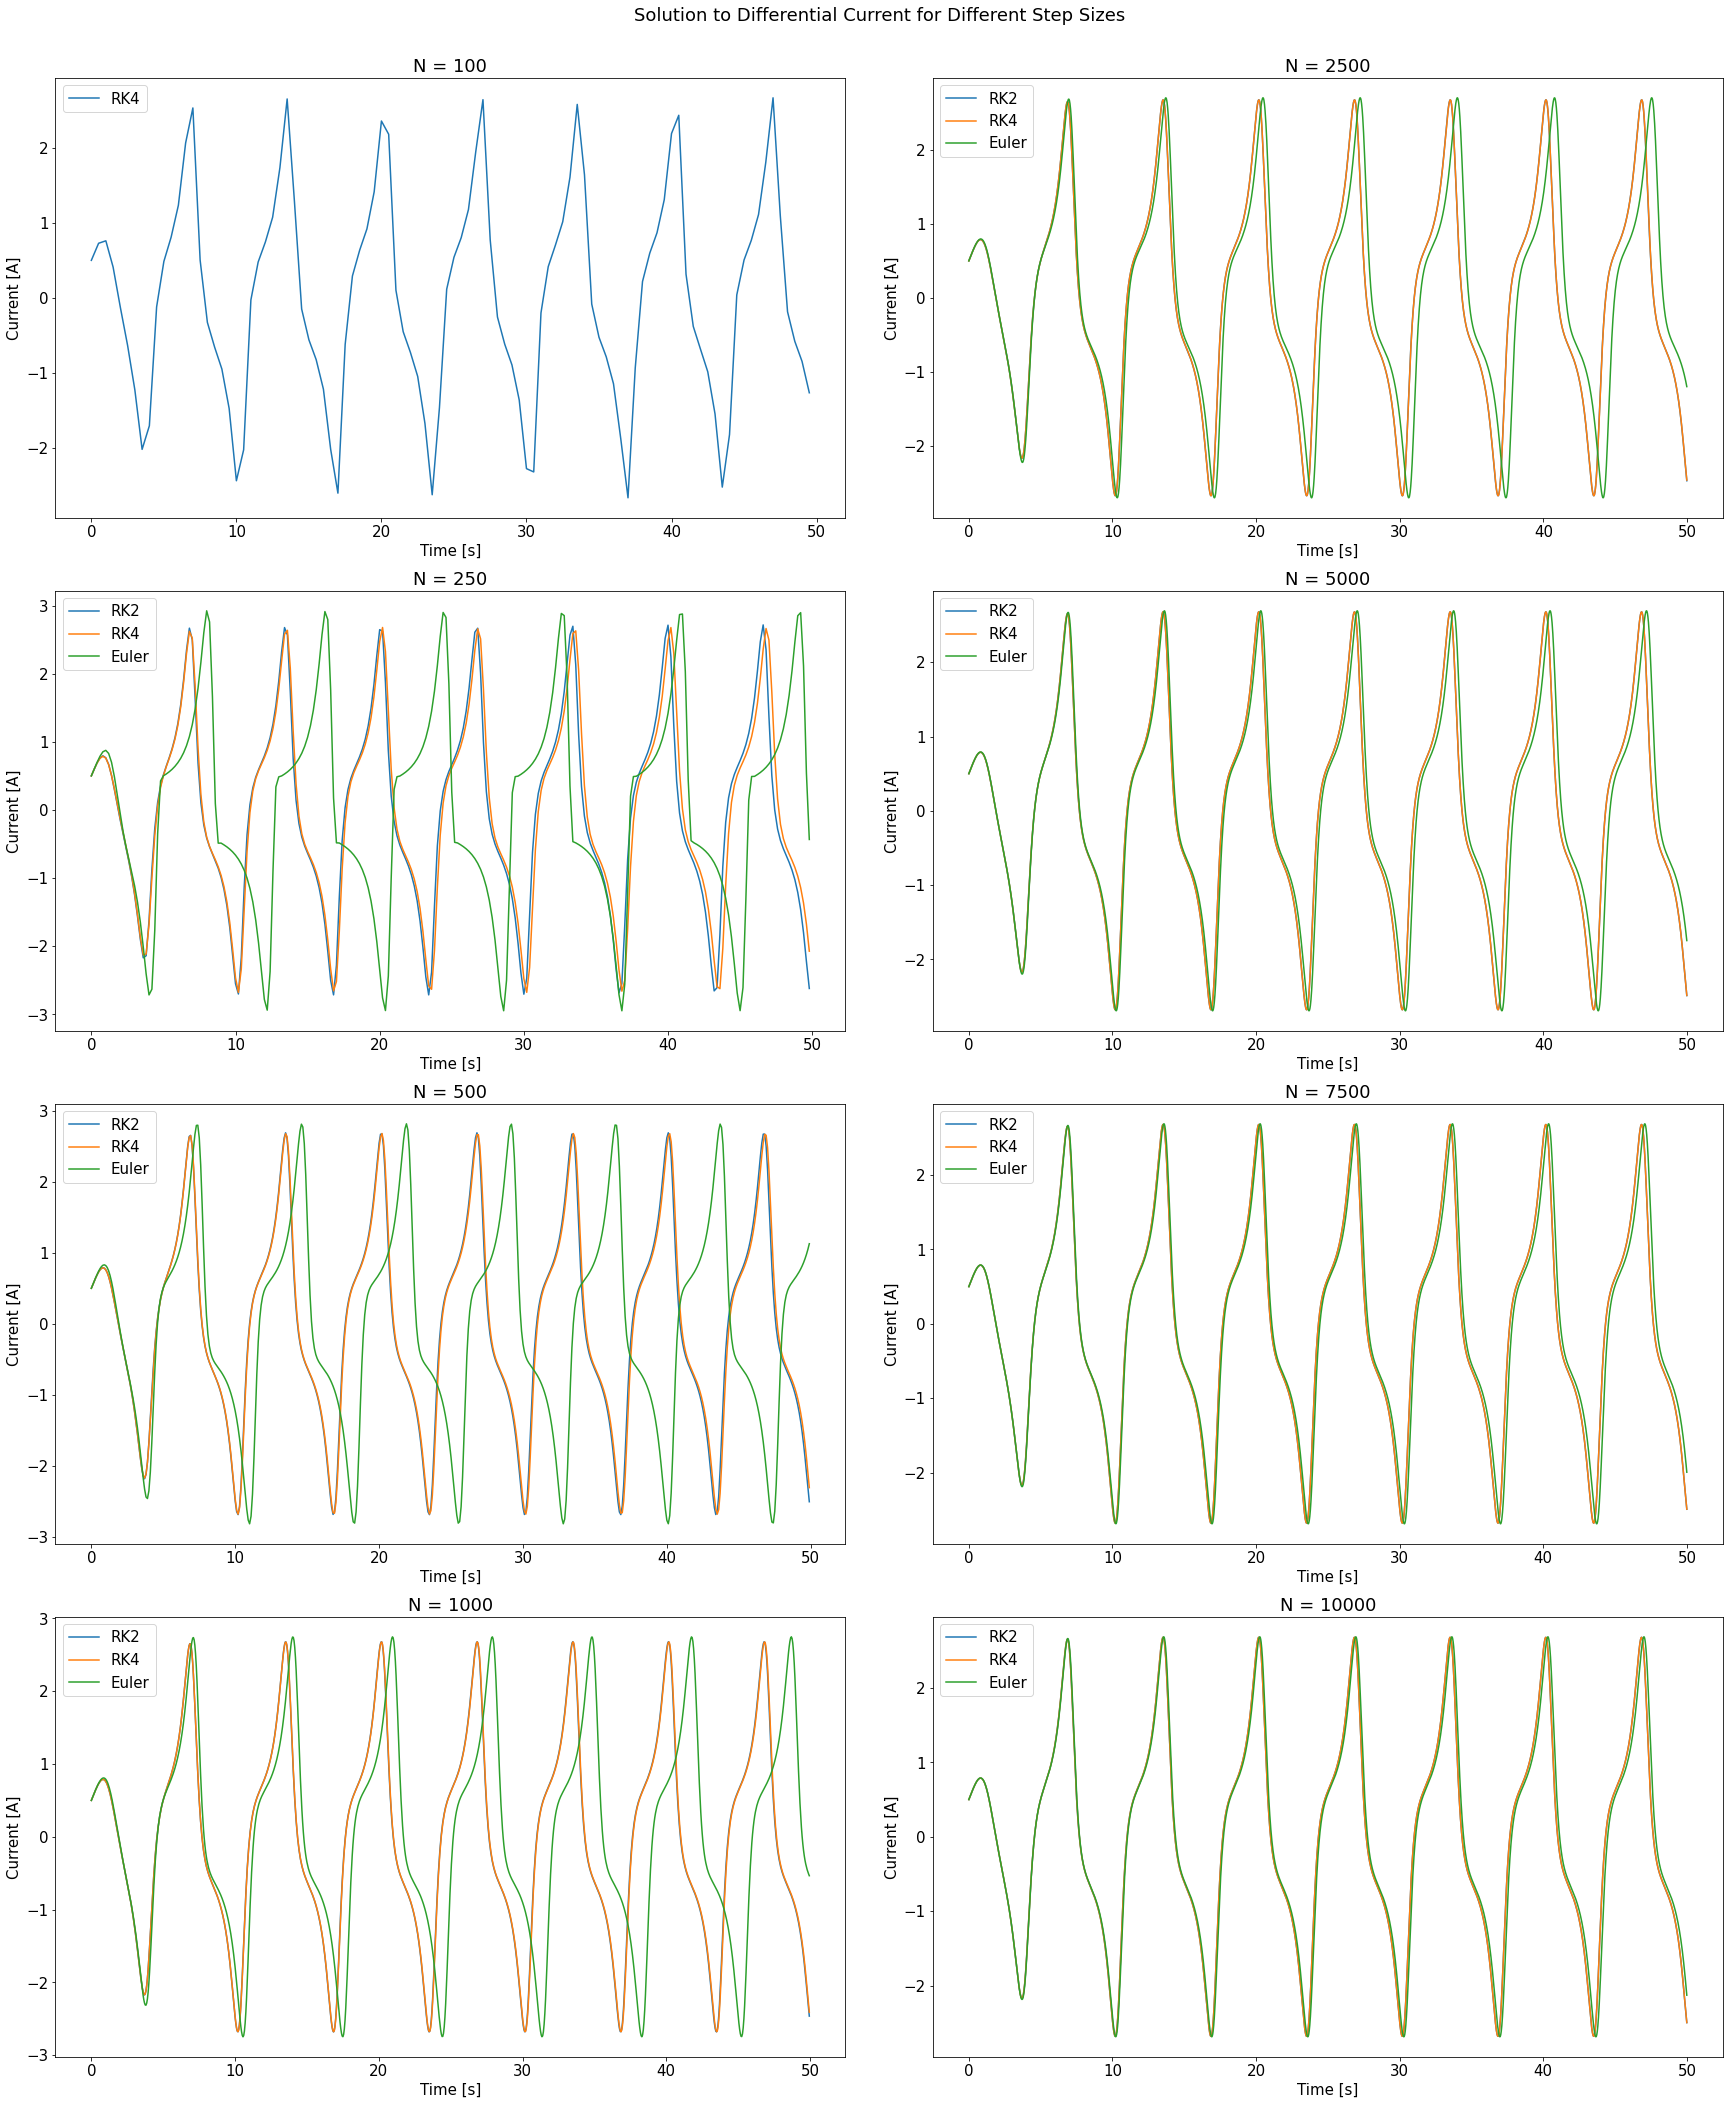

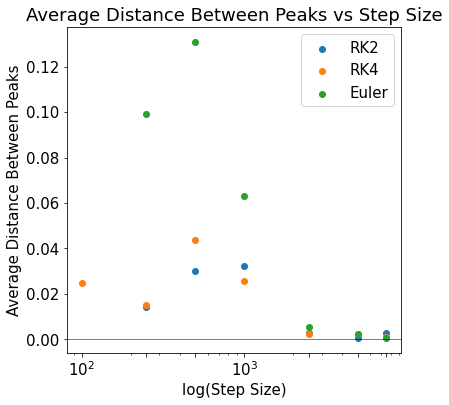

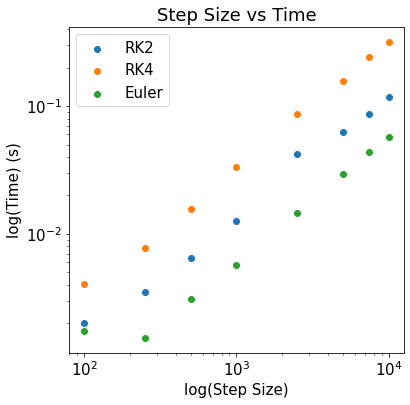

In [172]:
# Increase text size on all figures
plt.rcParams.update({'font.size': 15})

# Figure and axis to plot solutions
fig,ax = plt.subplots(4,2)
fig.set_size_inches(25,30)
fig.suptitle("Solution to Differential Current for Different Step Sizes")
fig.tight_layout(pad = 3)

# Figure, axis to plot accuracy
fig1,ax1 = plt.subplots(1)
fig1.set_size_inches(6,6)

# Figure to plot speed
fig2, ax2 = plt.subplots(1)
fig2.set_size_inches(6,6)

# Run numerical methods and plot all variables needed
putting_it_together(1, ax, ax1, ax2)


Again, by N = 10000, each of the numerical methods produce a solution of the same shape, and again, it appears Euler’s Method is not quite converged to either Runge Kutta Methods. However, when looking at the second figure at N = 7500 steps, it appears that the average distance between the peaks calculated by Euler’s Method is less than the average distance calculated by either Runge Kutta methods, meaning the Runge Kutta methods are not yet converged, but Euler’s is. This is likely due to numerical inaccuracies in the methods though and is just a random fluctuation, as both Runge Kutta methods appear to converge between N = 5000 and 7500 steps. However, any fewer number of steps and every numerical method appears to be inaccurate, and not even approaching convergence. Note that there is not data on the accuracy for the Second-Order Runge Kutta or Euler’s Method for N = 100 steps; this is because for so few steps, both methods blew up exponentially when calculating the current. Therefore, their data was removed for N = 100 to better visualize the results.


Again, Euler’s Method is the fastest method, followed by Second-Order Runge Kutta Method, then Fourth-Order Runge Kutta Method. Once again, the same trend holds, that an increase in steps corresponds to an exponential increase in speed of the algorithm.


#### B. Overdamped, $\mu = 5$

The final case considered is the overdamped oscillator, where $\mu = 5$.

/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/3821670174.py:14: RuntimeWarning: overflow encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/3287941457.py:23: RuntimeWarning: invalid value encountered in add
  k_2 = h*f((r+0.5*k_1),mu)
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/3821670174.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/808781210.py:26: RuntimeWarning: invalid value encountered in add
  r += (k1+2*k2+2*k3+k4)/6
/var/folders/zc/lq5lb1kj747f10z83djsw_t80000gn/T/ipykernel_48331/2889960738.py:21: RuntimeWarning: invalid value encountered in add
  r += h*f(r,mu)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with l

Plotting solution to differential equation for different values of N
Plotting average difference between the same peaks of two different step sizes
Plotting speed of each numerical method


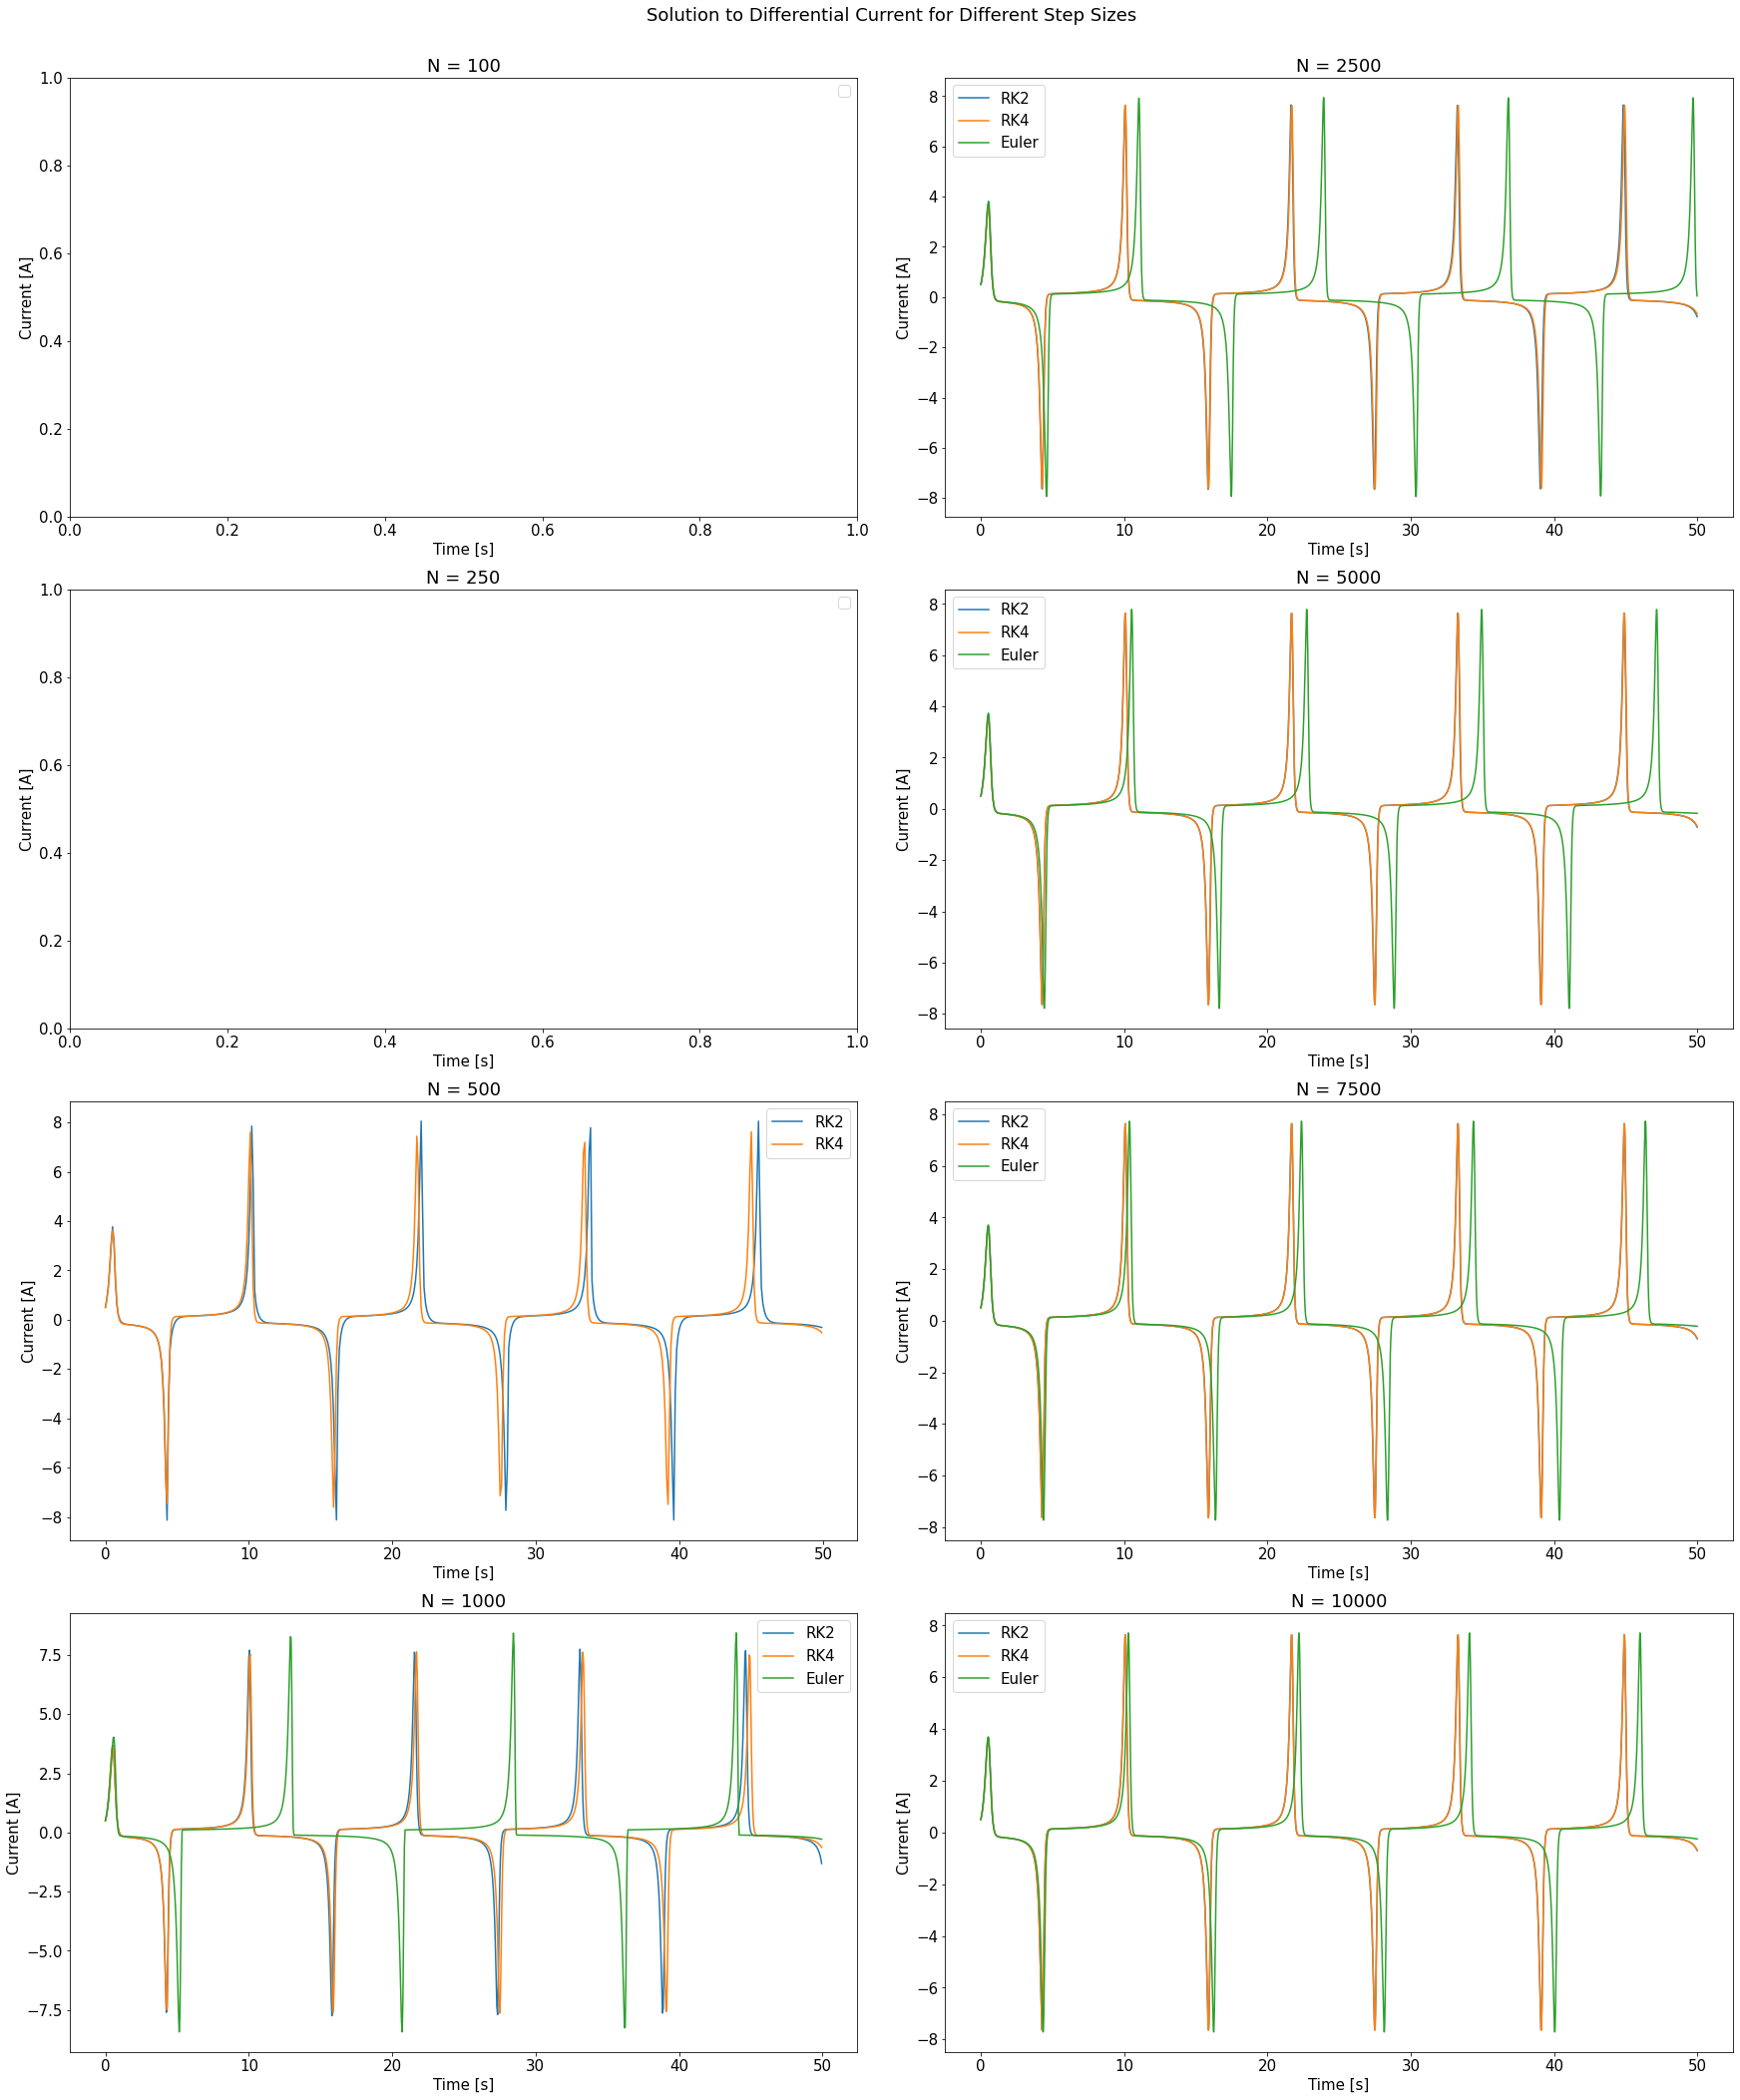

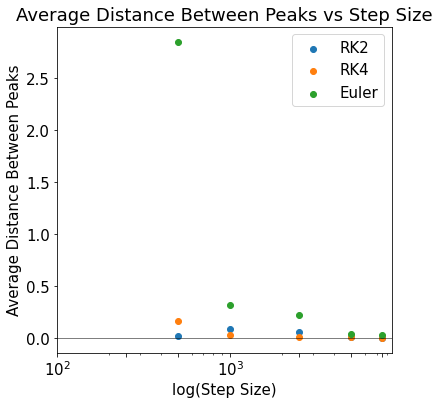

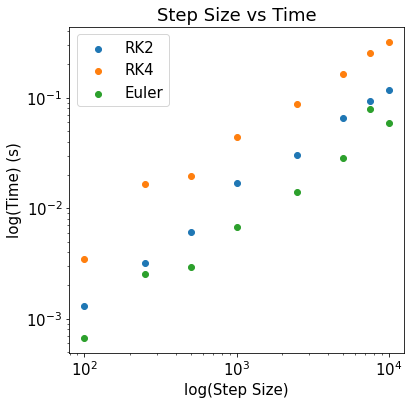

In [173]:
# Increase text size on all figures
plt.rcParams.update({'font.size': 15})

# Figure and axis to plot solutions
fig,ax = plt.subplots(4,2)
fig.set_size_inches(25,30)
fig.suptitle("Solution to Differential Current for Different Step Sizes")
fig.tight_layout(pad = 3)

# Figure, axis to plot accuracy
fig1,ax1 = plt.subplots(1)
fig1.set_size_inches(6,6)

# Figure to plot speed
fig2, ax2 = plt.subplots(1)
fig2.set_size_inches(6,6)

# Run numerical methods and plot all variables needed
putting_it_together(5, ax, ax1, ax2)


Note neither the plot of N = 100 or 250 contain any results, and N = 500 does not contain Euler’s Method; this is because the omitted numerical methods blew up exponentially as a result of inaccurate estimates for the next iteration. However, with N = 1000 steps, all three numerical methods were able to find a solution of roughly the same shape.

Based on the first figure, it appears that once again, all the numerical solutions have the same shape, where the current seems to pulse every 5 seconds or so. However, the period of Euler’s Method must be slightly longer than that of either Runge Kutta methods since by 50 seconds, Euler’s method is not in phase with the Runge Kutta methods. The slight difference can be easily seen in the plot of accuracy, where at N = 7500, the average difference using Euler’s Method is non-zero.

When considering the second plot, it appears at N = 500, the Second-Order Runge Kutta Method converges. However, at N = 1000 and 2500, the difference is significantly non-zero, implying that the convergence at N = 500 may have been a fluctuation in the numerical method. The Fourth-Order Runge Kutta Method converges at N = 1000, which follows the same trend as the underdamped solutions.

The speed of the algorithms follow the same trend, in which Euler’s Method is fastest, followed by Second-Order Runge Kutta, then Fourth-Order Runge Kutta.

##  Conclusion and Perspectives

### Conclusions and Sources of Errors


For all damping factor considerations, the Fourth-Order Runge Kutta Method converged to the true solution in the fewest number of steps, followed by the Second-Order Runge Kutta Method, and then Euler’s Method. Based on the results for the underdamped oscillator, we found that the Fourth-Order Runge Kutta Method converged to the true solution in N = 500 steps. All methods considered appeared to follow the same trend in that an increase in number of steps meant a decrease in the difference in the peak current between two step sizes. The same trend held for the overdamped oscillator, where we found by N = 1000, all numerical methods are very clearly approaching a true solution since the average distance decreases with each number of steps increase. Although the numerical methods followed the same order of accuracy for the underdamped oscillator, it took more steps for the Fourth-Order Runge Kutta to converge to a true solution in the overdamped oscillator; the Fourth-Order Runge Kutta Method did not converge until N = 2500, meaning a greater number of steps is required for convergence for the overdamped oscillator than the underdamped oscillator. Both the underdamped and overdamped oscillator converged much faster than the critically damped oscillator, in which the Fourth-Order Runge Kutta Method converged after N = 5000 steps. At any number of steps less than 5000, the numerical methods used for the critically damped oscillator did not appear to be converging to any solution. This could be due to an error in the algorithm for calculating the accuracy because many other scientists have performed a similar study, and found that these numerical methods are very accurate by using statistical error approximating methods [6]. This means that there must be an error in my method for calculating the accuracy.

The errors in accuracy likely came from SciPy’s signal.find_peaks_cwt function. It had difficulty finding the peak currents for the critically damped and overdamped oscillators because there were many points where there was a local maximum of a current, but not the maximum current for the period. In an attempt to fix this issue, I filtered the relative maxima so they were only recorded if they were greater than 2 Amps. This filtering method worked well for the overdamped scenario, but the critically damped oscillator did not see a change in accuracy. To work through this error in the future, I would write my own function that calculates the relative maxima. It would be written to calculate the maximum current for each period, with the difficulty being calculating the period from only the data points.

The speed of each numerical method did not change between the different values of the damping factor. This makes sense because the only difference in the algorithm between each value of the damping factor was the value itself; the algorithm was not changed. Note that since the plots of the speed are given as a log-log plot, the linear-appearing trend of number of steps to speed is actually exponential; therefore, a linear increase in the number of steps leads to an exponential increase in the time it takes to run any of the algorithms.

### Final Remarks and Future Projects
Although there is no way to find the analytical solutions to the Van der Pol Differential Equation for $\mu > 0$, it has been shown that numerical methods learned in class can be used to find an accurate solution. However, one must decide between high speed versus high accuracy at the same number of steps. Although the Fourth-Order Runge Kutta Method converges in the fewest number of steps, if one is considering the current through the circuit for many minutes or hours, the speed it takes to run this method exponentially increases, possibly to minutes. Even though Euler’s Method is significantly faster at the same number of steps as the Fourth-Order Runge Kutta, it takes over N = 7500 steps to converge. Therefore, for Euler’s Method to be as accurate as the Fourth-Order Runge Kutta Method, one would need many more steps, which increase the time needed to run the algorithm, possibly to a time equal or greater than the time taken to run the Fourth-Order Runge Kutta Method for a less number of steps.

It would be an interesting future project to compare the speed of the Fourth-Order Runge Kutta Method to that of Euler’s Method calculated with the number of steps that makes its accuracy equal to that of the Fourth-Order Runge Kutta. It is expected that the Fourth-Order Runge Kutta Method will be the faster of the two when the accuracy is equal. Therefore, it is most beneficial to use the Fourth-Order Runge Kutta Method; it offers the best accuracy for the fastest speed, just as discovered in class.

## References

[1] Michael Rozman. Van der pol oscillator. University of Connecticut, 2013.

[2] H. Ward Silver. Vacuum tubes. Nuts and Bolts, page 8–9, Sep 2017.

[3] Alvaro Salas, Lorenzo J. Mart ́ınez H, and David L. Ocampo R. Analytical and numerical study to a forced van der pol oscillator. Mathematical Problems in Engineering, 2022:1–9, Mar 2022.

[4] Transforming a second-order differential equation into system of first-order, Jan 2021.

[5] SciPy. ”scipy.signal.find_peaks_cwt”. 2023.

[6] Abdul Sattar Soomro, Gurudeo Tularam, and Muhammad Majtaba Shaikh. A comparison of numerical methods for solving the unforced van der pol’s equation. 2013.

[7] Duke Mathematics. The van der pol system. Duke Mathematics, 1998.

[8] Manuela Girotti. The van der pol oscillator. Georgia Tech, 2022.

##  Appendices


### Appendix A
#### A.1
The voltage change across an inductor can be represented by 
\begin{equation}
    V = I \frac{dI}{dt}. \nonumber
\end{equation}
Therefore, by letting $I = 1 H$, the first derivative of current can be represented simply by the voltage.

#### A.2
Briefly, we will show how Equation 1 can be derived [3][4].  We begin by writing the current through the circuit according to Kirchoff's Laws as
\begin{equation}
    L\frac{dI}{dt}+RI+\frac{1}{C}Q = E, \nonumber
\end{equation}
which, when differentiated, becomes the second-order linear differential equation
\begin{equation}
    L\frac{d^2I}{d^t}+R\frac{dI}{dt}+\frac{1}{C}I = 0. \nonumber
\end{equation}
This equation represents a standard damped harmonic oscillator, which occurs when the resistor can assumed to be Ohmic. However, the resistor is non-Ohmic, which means when the current is too low, energy will be added to the system, and when current is too high, energy is damped (not removed, like an Ohmic resistor).  When Van der Pol studied this phenomenon, he found Equation 2 was more accurately stated as 
\begin{equation}
    L\frac{dI}{dt} + (I^2-\alpha)I + \frac{1}{C}Q = E. \nonumber
\end{equation}
By differentiating this equation, we find 
\begin{equation}
    L\frac{d^2I}{d^2t} + 3\frac{dI}{dt}(I^2-\frac{\alpha}{3})I + \frac{1}{C}I = 0. \nonumber
\end{equation}
Once rescaled into dimensionless variables, we find the orginal Van der Pol differential equation, given by Equation 1.

If we include an AC source that produces a voltage $V = Fcos(\omega t)$ in series with the DC source, we add a driving force, Equation 1 then becomes 
\begin{equation}
    \frac{d^2 x}{d^2 t} + \mu(1-x^2)\frac{dx}{dt} = Fcos(\omega t).
\end{equation}